# Trumpet plot

Trumpet plots were introduced in the research article

Corte L, Liou L, O'Reilly PF, García-González J. Trumpet plots: visualizing the relationship between allele frequency and effect size in genetic association studies. *GigaByte*. 2023 Sep 1;2023:gigabyte89. doi: 10.46471/gigabyte.89. PMID: 37711278; PMCID: PMC10498096.

and its goal is to visualize effect size of risk variants across the allele frequency spectrum.

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import trumpet_draw
from ideal_genom.get_examples import get_trumpet_quantitative_example, get_top_hits_trumpet_quantitative

The first example corresponds to a trumpet plot for a quantitative trait: height. We are going to use the summary statistics provided in the study:

Akiyama, M., et. al. (2019): Characterizing rare and low-frequency height-associated variants in the Japanese population. *Nature communications*, 10(1), 4393.

In [2]:
example_path = get_trumpet_quantitative_example()

INFO:ideal_genom.get_examples:File already exists: /mnt/DataVol/CGE/IDEAL-GENOM/data/sumstats/2019_BBJ_Height_autosomes_BOLT.txt


The aforementioned file is not small (more than 2 Gb) so it will be loaded in chunks and filtered, in order to get the SNPs with smallest p-values.

In [3]:
chunk_size = 2000

filtered_chunks=[]

filepath = '/mnt/DataVol/CGE/IDEAL-GENOM/data/sumstats/2019_BBJ_Height_autosomes_BOLT.txt'

for chunk in pd.read_csv(filepath, sep=r'\s+', engine='python', chunksize=chunk_size):
    
    filtered_chunk = chunk[chunk['P_INF'] < 5e-50].reset_index(drop=True)
    filtered_chunks.append(filtered_chunk)

df_gwas = pd.concat(filtered_chunks, ignore_index=True)

In [4]:
df_gwas

,Variants,CHR,POS,REF,ALT,ALT_freq,MAF,Rsq,BETA,SE,P_INF,P_BOLT
0,1:118849762_G_C,1,118849762,G,C,0.52299,0.47701,0.96539,-0.048750,0.003139,2.100000e-54,1.100000e-57
1,1:118849909_G_A,1,118849909,G,A,0.51533,0.48467,0.96793,-0.047866,0.003134,1.100000e-52,1.600000e-56
2,1:118850501_G_T,1,118850501,G,T,0.51475,0.48525,0.97157,-0.047843,0.003127,7.900000e-53,1.000000e-56
3,1:118854698_G_A,1,118854698,G,A,0.51577,0.48423,0.98830,-0.047492,0.003101,6.100000e-53,6.900000e-57
4,1:118855587_A_G,1,118855587,A,G,0.48435,0.48435,0.98910,0.047329,0.003100,1.200000e-52,1.500000e-56
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,20:34107956_A_G,20,34107956,A,G,0.23650,0.23650,0.97550,0.055533,0.003703,7.900000e-51,2.300000e-52
1066,20:34109273_G_T,20,34109273,G,T,0.22376,0.22376,0.99934,0.057645,0.003732,8.000000e-54,8.100000e-56
1067,20:34109427_A_G,20,34109427,A,G,0.22380,0.22380,0.99992,0.057618,0.003731,8.200000e-54,8.400000e-56
1068,20:34109715_T_C,20,34109715,T,C,0.22409,0.22409,0.99719,0.057749,0.003734,5.900000e-54,6.300000e-56


We have followed the recommendation in the source article and allow for positive and negative values of `BETA`, and then we only take into account the minor allele frequency.

Although most parameters are self explanatory, it is important to emphasize some of them. Since we have a GWAS for a continuous trait, `mode` must be set to `quantitative`. In order to compute the power curves, the sample size is needed. One option is to provide it through the parameter `sample_size` or give the column in the summary statistics corresponding to the sample size of each SNP in the parameter `n_col`.

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000


INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3935 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3918 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3901 eaf-beta 

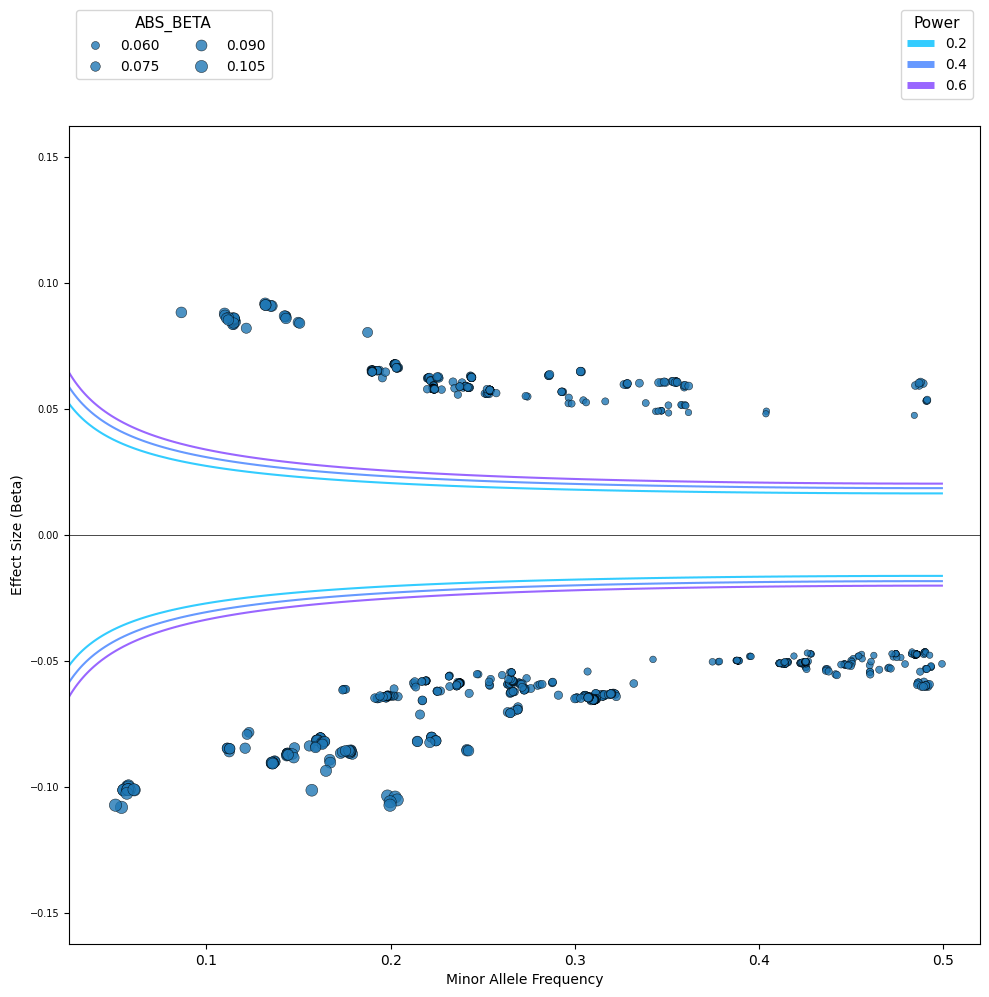

True

In [5]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot.jpeg',
)

What if we want to highlight some SNPs, for example the top hits?

We only have to provide a list of the desired SNPs.

In [6]:
tophits_path = get_top_hits_trumpet_quantitative()

INFO:ideal_genom.get_examples:File already exists: /mnt/DataVol/CGE/IDEAL-GENOM/data/sumstats/2019_BBJ_Height_autosomes_BOLT_top.csv


In [7]:
to_highlight = pd.read_csv(tophits_path, sep=r'\s+', engine='python')

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08


INFO:ideal_genom.power_comp: -Found 3935 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3918 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3901 eaf-beta combinations with power >= 0.6 and columns: Index(['eaf', 

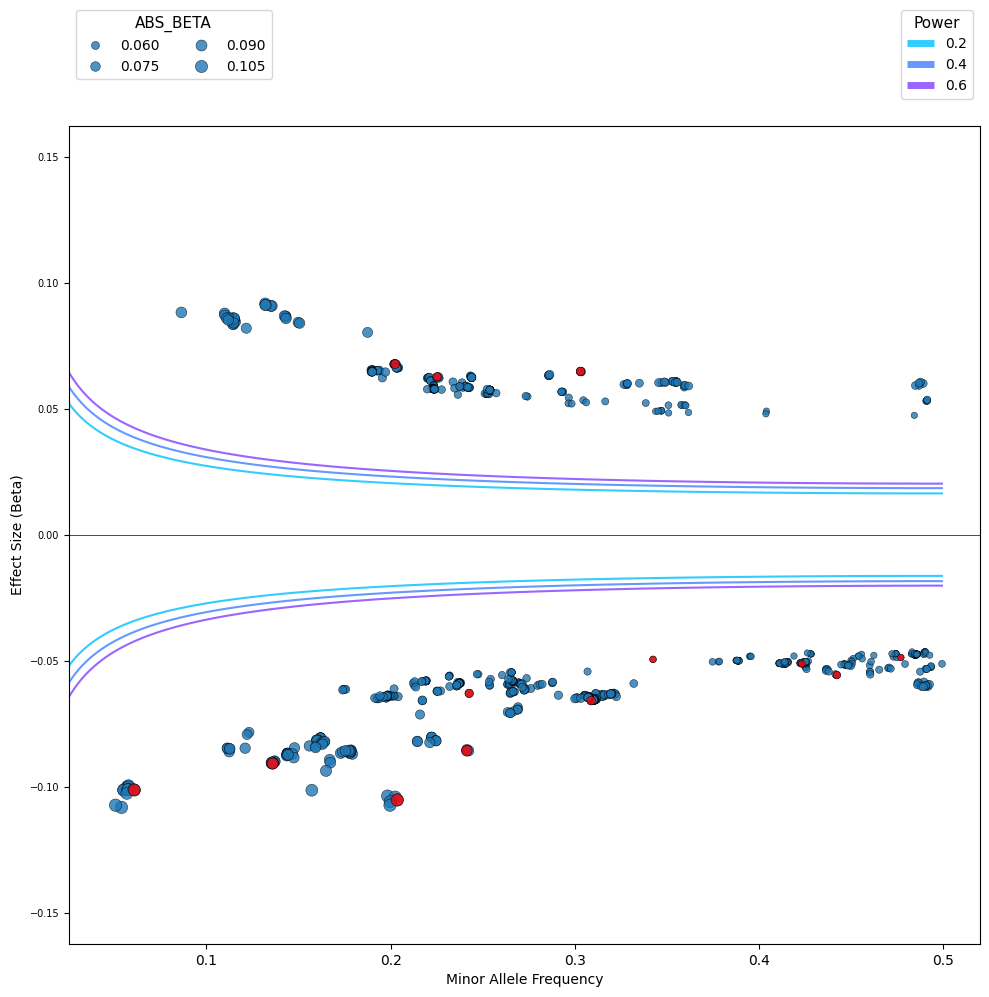

True

In [8]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_high.jpeg',
    to_highlight=to_highlight['Variants'].tolist(),
)

In case we wanted to add gene annotations, it is simple. Although, it is important to remark that annotations can overload the plot. The parameter `to_annotate` receive a data frame with the SNPs to annotate.

There are two possibilities for annotations:
1. We already have the gene annotations and they are in the data frame (in this case we must give the gene name column);
2. We only know the SNPs to annotate.

In the second case, the library automatically annotates the SNP using RefSeq or Ensembl databases. This can be specified in the parameter `source` defaulted to `ensembl`.

The example we are using has coordinates according to build 37 of the human genome, so it must be specified with the parameter `build` which has build 38 as default.

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3935 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3918 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF

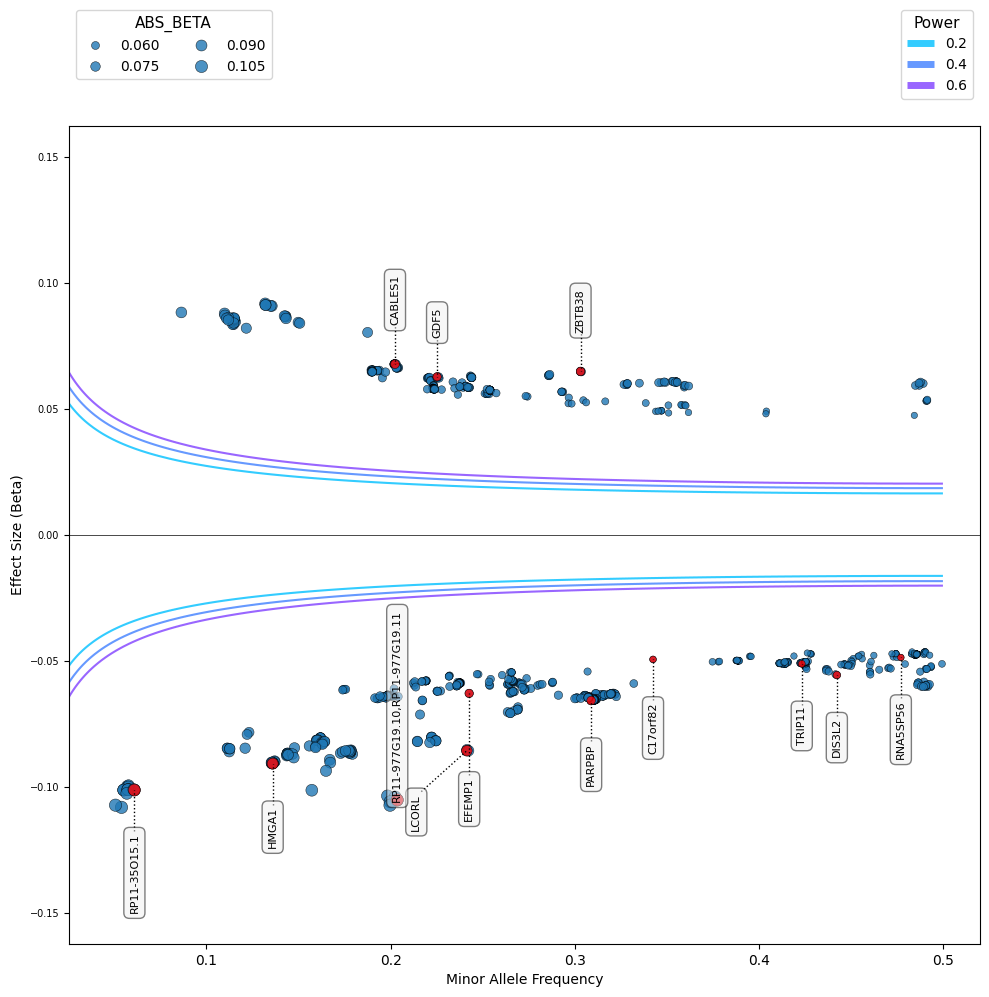

True

In [9]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_high.jpeg',
    to_highlight=to_highlight['Variants'].tolist(),
    to_annotate=to_highlight,
    build      ='37',
)

Finally, we can also manipulate the scale of the x axis.

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08


INFO:ideal_genom.power_comp: -Found 3935 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3918 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.0917249)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3901 eaf-beta combinations with power >= 0.6 and columns: Index(['eaf', 

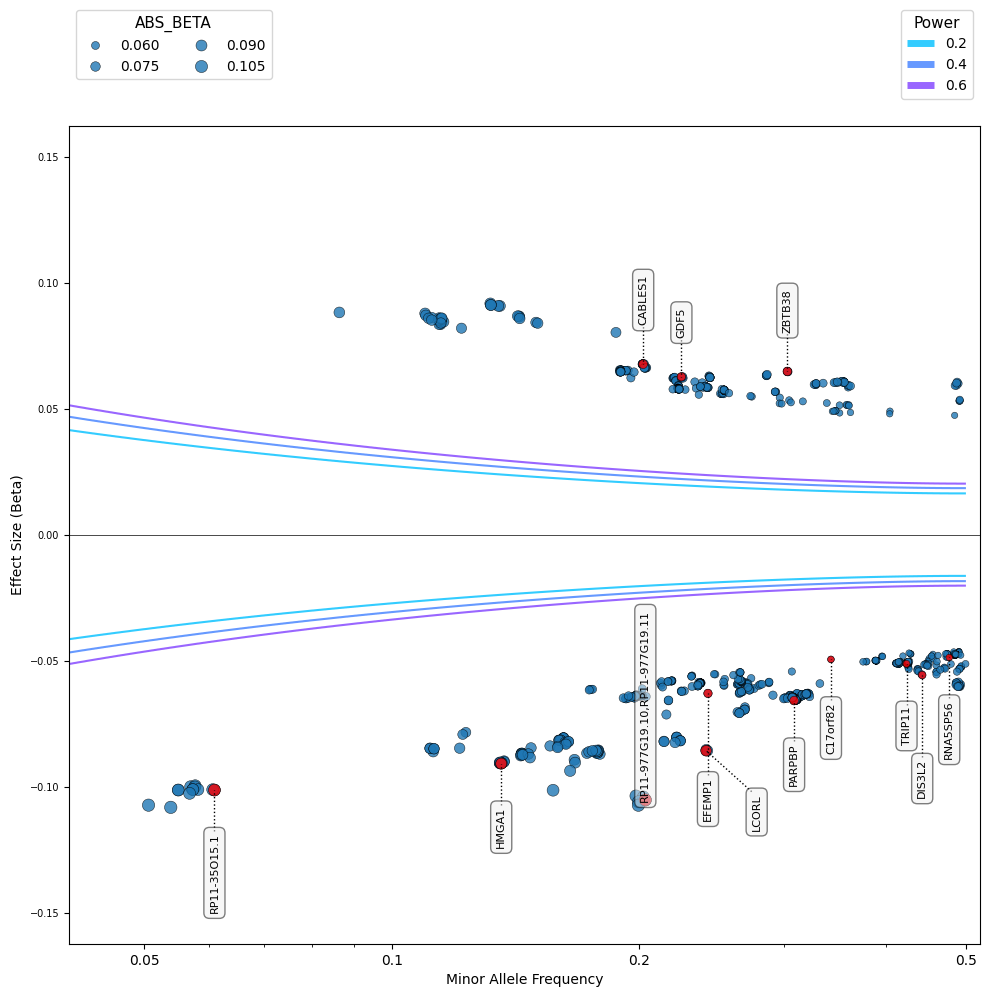

True

In [10]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_high.jpeg',
    to_highlight=to_highlight['Variants'].tolist(),
    scale='log',
    to_annotate=to_highlight,
    build      ='37',
)